# Part A: Install Detectron2

In [ ]:
# install dependencies: (use cu101 because colab has CUDA 10.1)
!pip install -U torch==1.4 torchvision==0.5 -f https://download.pytorch.org/whl/cu101/torch_stable.html 
!pip install cython pyyaml==5.1
!pip install -U 'git+https://github.com/cocodataset/cocoapi.git#subdirectory=PythonAPI'
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())
!gcc --version
# opencv is pre-installed on colab

Looking in links: https://download.pytorch.org/whl/cu101/torch_stable.html
     |████████████████████████████████| 753.4MB 20kB/s 
     |████████████████████████████████| 4.0MB 27.0MB/s 
  Found existing installation: torch 1.5.0+cu101
    Uninstalling torch-1.5.0+cu101:
      Successfully uninstalled torch-1.5.0+cu101
  Found existing installation: torchvision 0.6.0+cu101
    Uninstalling torchvision-0.6.0+cu101:
      Successfully uninstalled torchvision-0.6.0+cu101
     |████████████████████████████████| 276kB 2.8MB/s 
  Created wheel for pyyaml: filename=PyYAML-5.1-cp36-cp36m-linux_x86_64.whl size=44074 sha256=1da3cdf8cd2bc58ab89358b6be02dda90820e0096fe965e320950e03e983e1d0
  Stored in directory: /root/.cache/pip/wheels/ad/56/bc/1522f864feb2a358ea6f1a92b4798d69ac783a28e80567a18b
Successfully built pyyaml
  Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
  Cloning https://github.com/cocodataset/cocoapi.git to /tmp/pip

In [ ]:
# install detectron2:
!pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/index.html

Looking in links: https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/index.html
     |████████████████████████████████| 6.2MB 505kB/s 
  Created wheel for fvcore: filename=fvcore-0.1.dev200502-cp36-none-any.whl size=40567 sha256=8d6552ea062e3c708577f7a9014999405fe1b8636d653be64eb5234fb2319e7e
  Stored in directory: /root/.cache/pip/wheels/6c/e2/78/df116f1145ba7dd76f3103f13effc7dca51923bf618d0b53c7
Successfully built fvcore


In [ ]:
# You may need to restart your runtime prior to this, to let your installation take effect
# Some basic setup:
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import cv2
import random
from google.colab.patches import cv2_imshow

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog

# Part B: Run a pre-trained model for instance segmentation

--2020-05-03 17:12:14--  https://github.com/wallmosh/AMMI_Ghana_Lecture_Sessions_2020/blob/master/images/18?raw=true
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/wallmosh/AMMI_Ghana_Lecture_Sessions_2020/raw/master/images/18 [following]
--2020-05-03 17:12:14--  https://github.com/wallmosh/AMMI_Ghana_Lecture_Sessions_2020/raw/master/images/18
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/wallmosh/AMMI_Ghana_Lecture_Sessions_2020/master/images/18 [following]
--2020-05-03 17:12:15--  https://raw.githubusercontent.com/wallmosh/AMMI_Ghana_Lecture_Sessions_2020/master/images/18
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubus

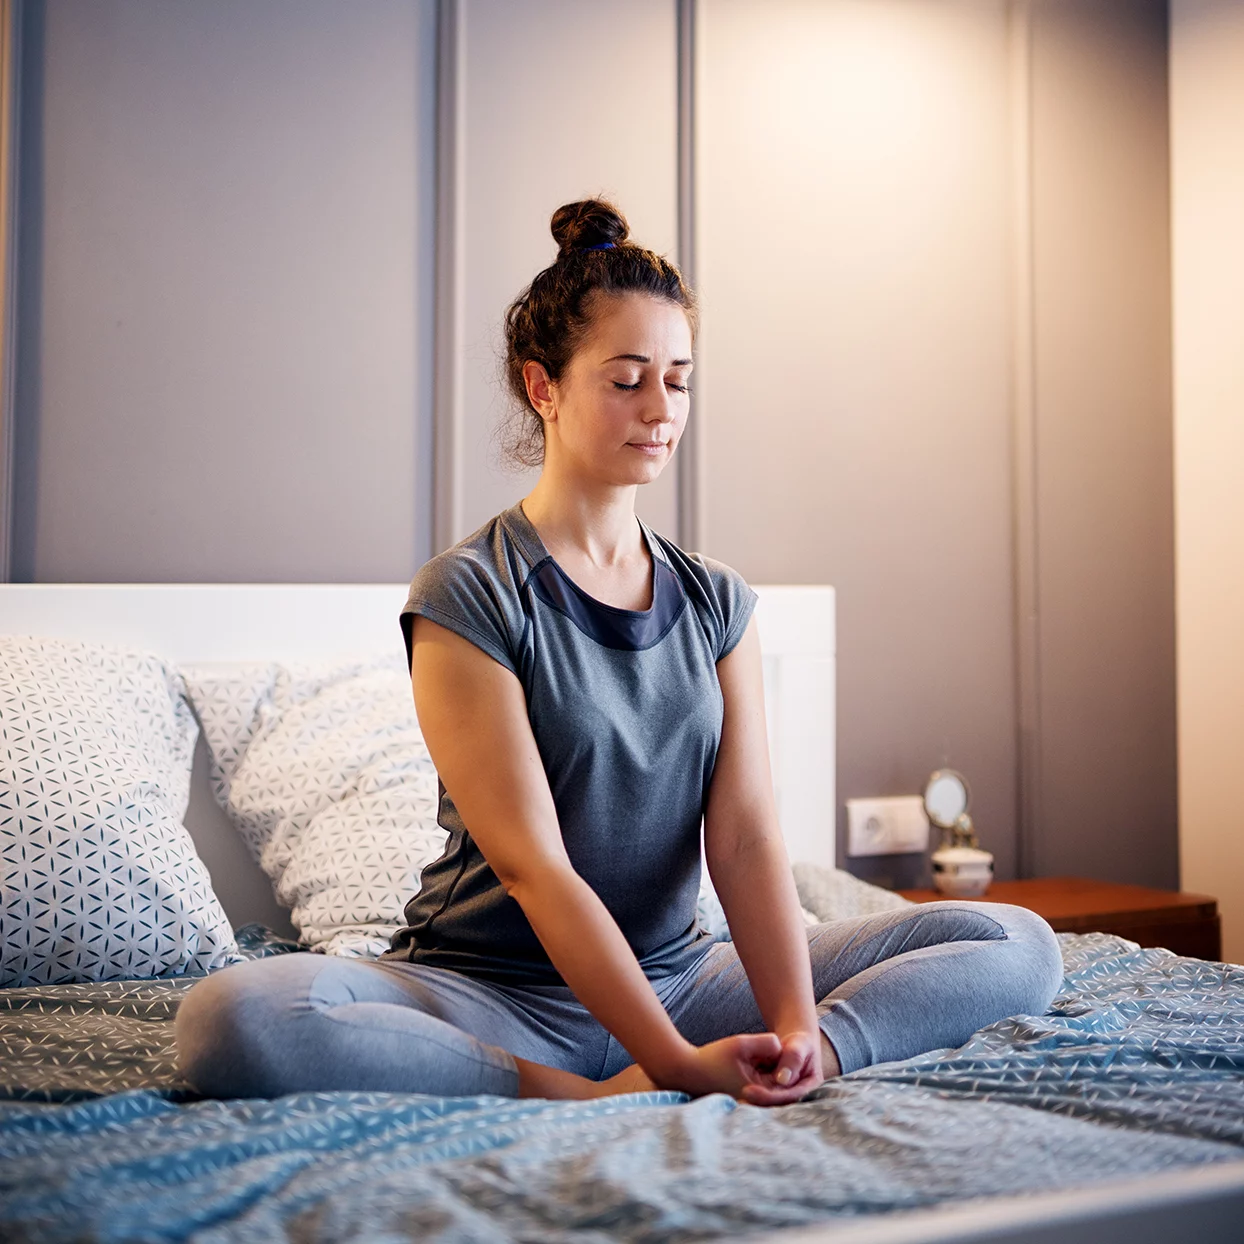

In [ ]:
!wget https://github.com/wallmosh/AMMI_Ghana_Lecture_Sessions_2020/blob/master/images/18?raw=true -O input.jpg
im = cv2.imread("./input.jpg")
cv2_imshow(im)

In [ ]:
cfg = get_cfg()
# add project-specific config (e.g., TensorMask) here if you're not running a model in detectron2's core library
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # set threshold for this model
# Find a model from detectron2's model zoo. You can use the https://dl.fbaipublicfiles... url as well
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
predictor = DefaultPredictor(cfg)
outputs = predictor(im)

In [ ]:
# look at the outputs. See https://detectron2.readthedocs.io/tutorials/models.html#model-output-format for specification
outputs["instances"].pred_classes
outputs["instances"].pred_boxes

Boxes(tensor([[ 189.5598,  227.5346, 1023.9268, 1119.3806],
        [  17.9910,  747.1065, 1230.8431, 1234.7109]], device='cuda:0'))

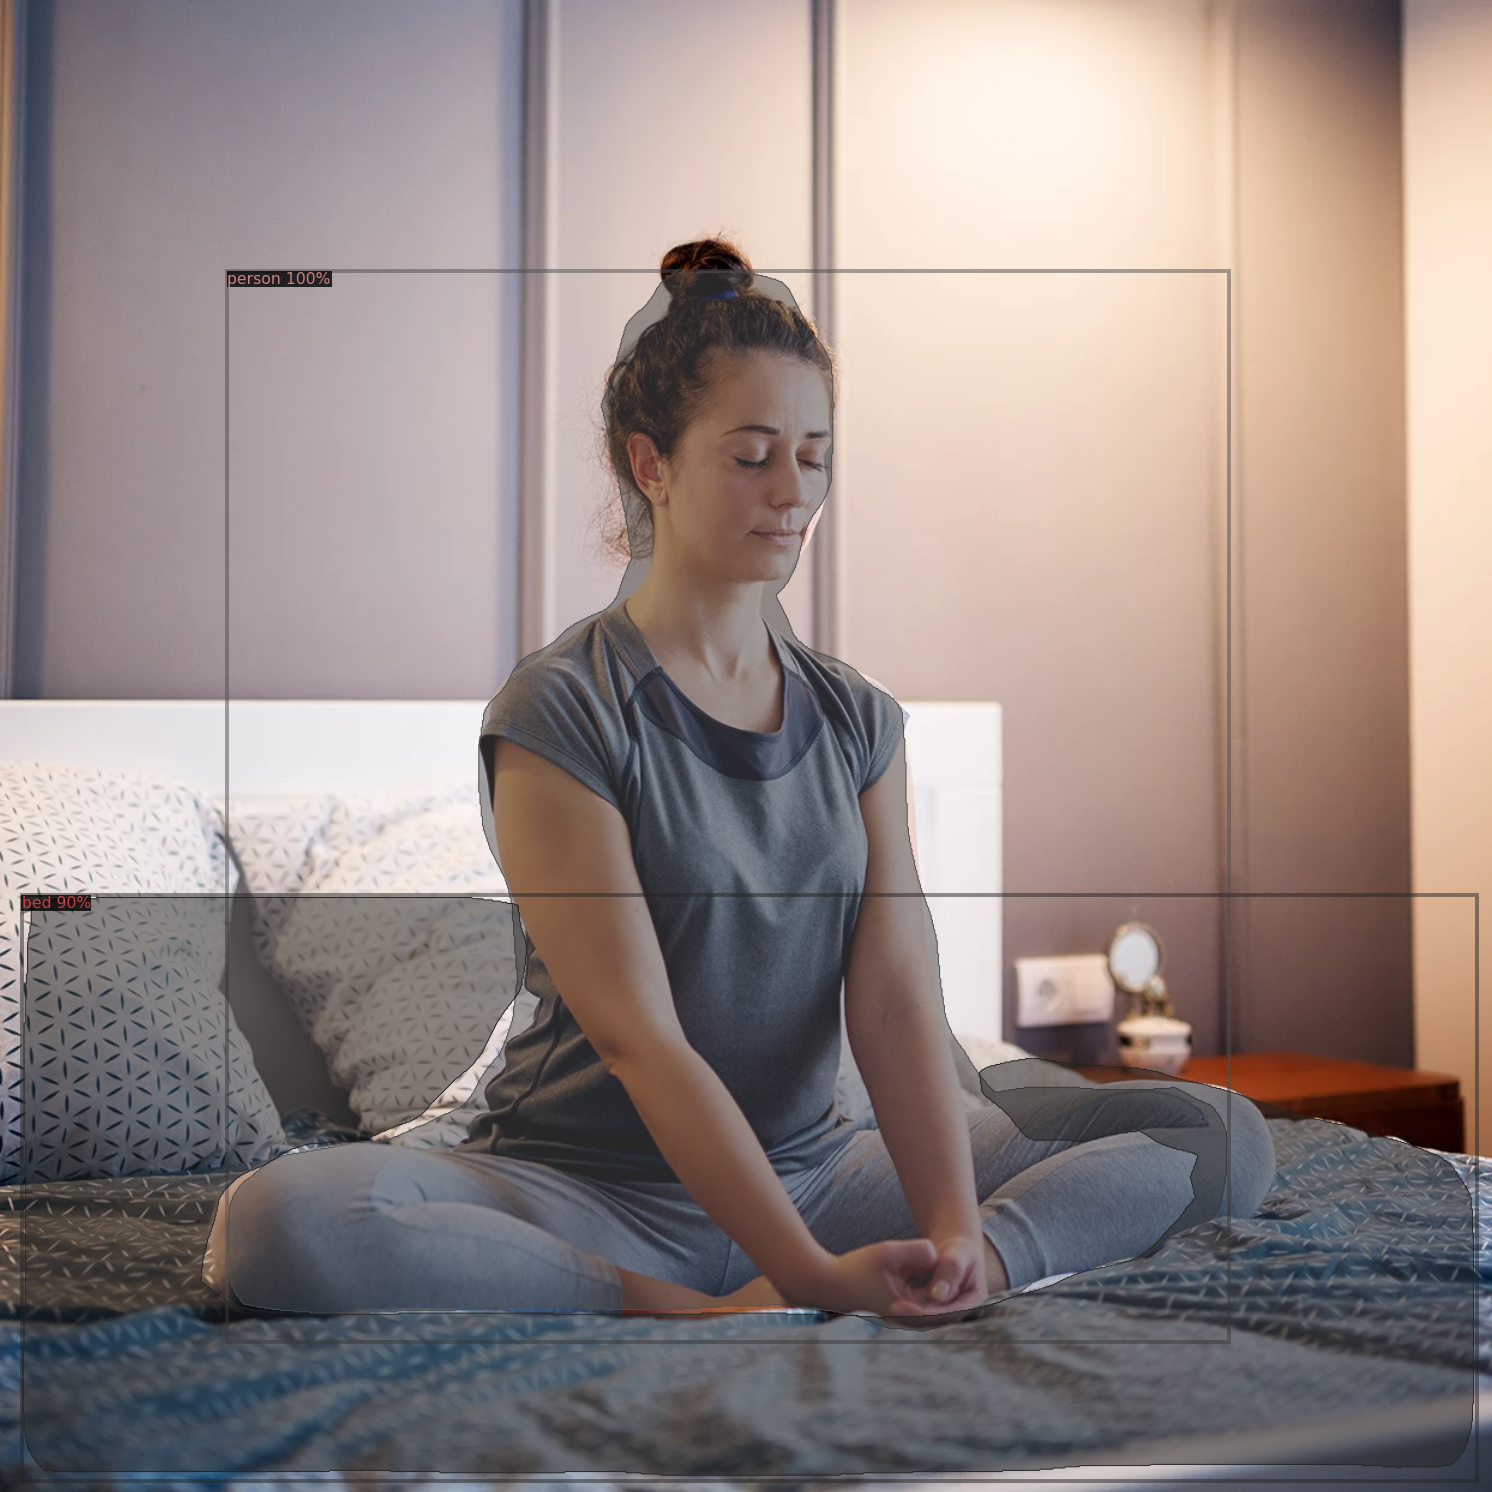

In [ ]:
# We can use `Visualizer` to draw the predictions on the image.
v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
cv2_imshow(v.get_image()[:, :, ::-1])

# Part C: Run a pre-trained model for pose estimation

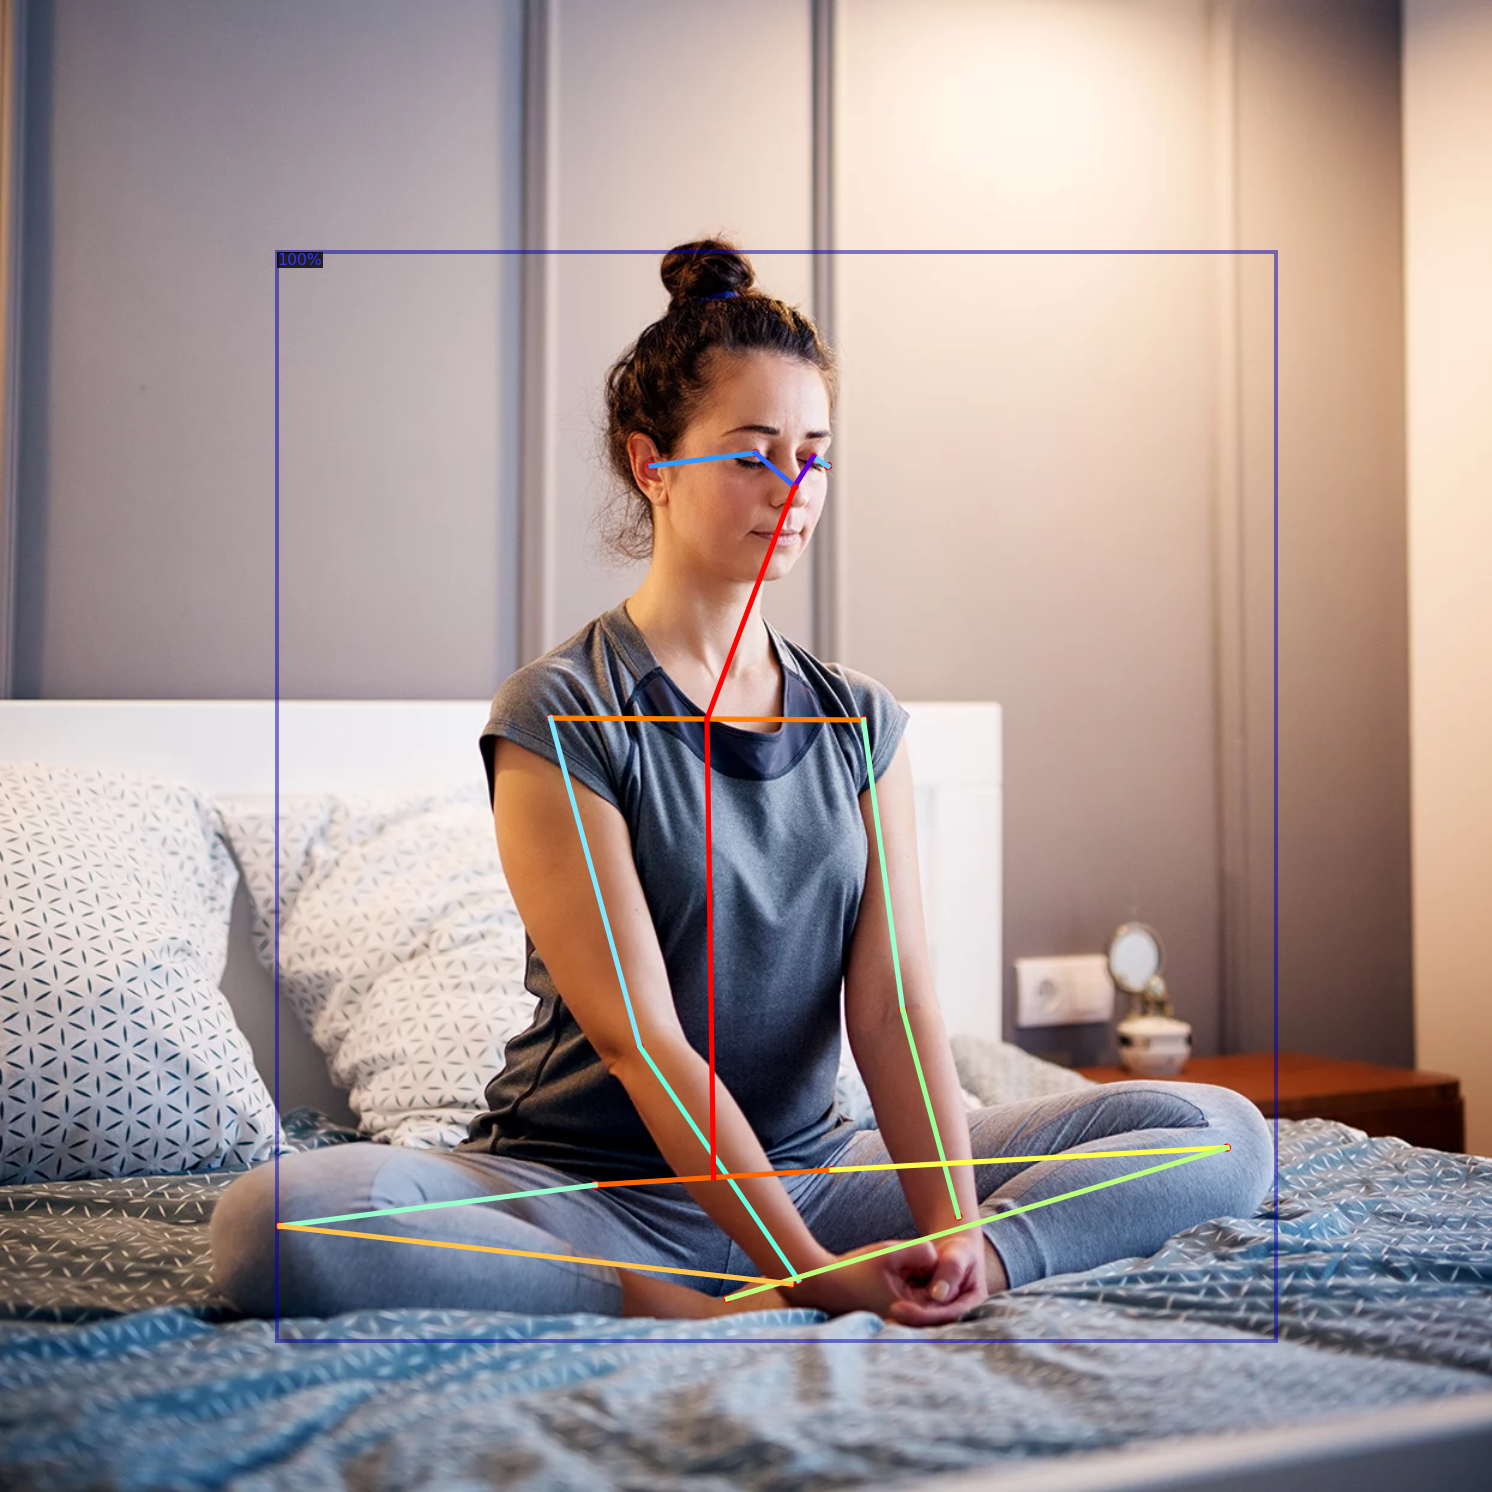

In [ ]:
# Inference with a keypoint detection model
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-Keypoints/keypoint_rcnn_R_50_FPN_3x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.7  # set threshold for this model
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Keypoints/keypoint_rcnn_R_50_FPN_3x.yaml")
predictor = DefaultPredictor(cfg)
outputs = predictor(im)
v = Visualizer(im[:,:,::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
cv2_imshow(v.get_image()[:, :, ::-1])

# Part D: Report
We want you to summarize your findings and exploration with Detectron2 on a short report.

**For each task**, namely instance segmentation (Part B) and human pose estimation (Part C), provide the following

* model architecture: This should include the method, the backbone architecture and the dataset it was pretrained on.
* examples: Visualizations of two examples of correct predictions, and two examples of false predictions. In the caption of the figures, say why the examples are correct or false.
* observations: From running the models on your images, you must have observed some interesting model behavior (remember these models do not achieve 100% accuracy!). Provide some interesting example cases and describe why the behavior of the model is interesting or unexpected.
* error modes: In a short paragraph, describe the error modes that you have discovered when running the models. Have you seen a pattern of mistakes that keep occuring even on different images? Do you have any insight on what is causing the errors/confusions?

The length of the report should not exceed 2 pages.